In [15]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [16]:
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/train'
val_path = '/content/drive/MyDrive/val'

In [17]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3] ,weights='imagenet',include_top=False)
 

In [18]:
for layer in resnet.layers:
  layer.trainable = False

In [19]:
x=Flatten()(resnet.output)

In [20]:
folders = glob('/content/drive/MyDrive/train/*')

In [21]:
prediction = Dense(len(folders),activation='softmax')(x)

In [22]:
model = Model(inputs=resnet.input,outputs=prediction)

In [23]:
# x=Flatten()(resnet.output)
model = Model(inputs=resnet.input, outputs=prediction)

In [24]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [25]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/val',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 324 images belonging to 4 classes.


In [30]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
61/61 [==============================] - 1391s 23s/step - loss: 3.0007 - accuracy: 0.3957 - val_loss: 1.4257 - val_accuracy: 0.5463
Epoch 2/50
61/61 [==============================] - 48s 789ms/step - loss: 1.3090 - accuracy: 0.5064 - val_loss: 1.4348 - val_accuracy: 0.4568
Epoch 3/50
61/61 [==============================] - 48s 785ms/step - loss: 1.0129 - accuracy: 0.6089 - val_loss: 1.4356 - val_accuracy: 0.4599
Epoch 4/50
61/61 [==============================] - 48s 785ms/step - loss: 0.8582 - accuracy: 0.6427 - val_loss: 0.9212 - val_accuracy: 0.5988
Epoch 5/50
61/61 [==============================] - 48s 782ms/step - loss: 0.9989 - accuracy: 0.6048 - val_loss: 0.8879 - val_accuracy: 0.5710
Epoch 6/50
61/61 [==============================] - 48s 783ms/step - loss: 0.8013 - accuracy: 0.6827 - val_loss: 0.6572 - val_accuracy: 0.7315
Epoch 7/50
61/61 [==============================] - 48s 783ms/step - loss: 0.7266 - accuracy: 0.7094 - val_loss: 0.7383 - val_accuracy: 0.7284

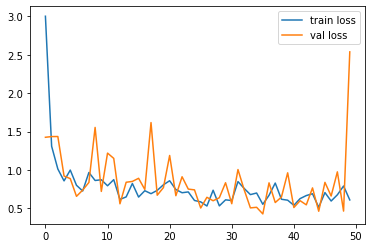

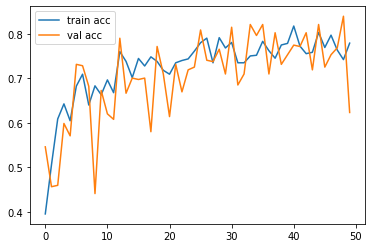

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')